In [13]:
import numpy as np

# From S&P 500
returns = [16.1,-1.7,17.7,23.9,9.4,16.4,11.8,10.2,18.8,15.1,8.2,12.3,10.4,10.7,13.4,-1.9,-1.7,17.6,11.6,18.4,10,22.4,
           23.6,18.3,17.1,18.5,16.2,19.8,14.6,-3.6,-28.1,20,26.5,27.1,24.6,11.4,18.8,6.2,1,7.2,5.3,-3.8,20.4,10.5,9.6,
           15.5,14.8,18,3.6,9.6,32.9,-3.3,-11.8,14.8,20.6,12.1,10.3,18.3,22.8,47.1,-7.3,16,5,28.6,6.6,-7.1,10.2,42.9,
           42.5,14.7,-16.2,4.3,26.4,-23.3,-26.9,62.9,5.2,20.2,22.2,46.3,48.9,-12.9,-13.9,66.8,-2.3,44.1,52.2,-7.9,17.9,
           17.4,-17.5,34.2,0.5,40.5,-8.2,20.2,14,11.4,8.5,19.3,5,10.1,-8.1,15.9,27.6,21.1,25,18,-40.4,39.6,3.3,-11.4,
           18.8,19.7,5,3.8,11.6,12.5,-2.8]
returns = np.asarray(returns)/100

print(len(returns), np.mean(returns), np.std(returns))
mean = np.mean(returns)
std = np.std(returns)

###########################
### Parameters ###
inflation = 2.5
num_trials = 10
starting_expenses = 20000

results = list()

for withdrawalRateTimesTen in range (30, 100, 5):
    withdrawalRate = withdrawalRateTimesTen / 10
    print("withdrawalRate", withdrawalRate)
    for adaptAnalysis in range(0, 2, 1):
        adapt = False
        # Step by 10 to show points on graph
        for lifespan in range(20, 80, 10):
            success = 0
            for life in range(num_trials):
                expenses = starting_expenses
                money = expenses * 100.0 / withdrawalRate
                oldmoney = money
                for year in range(lifespan):
                    oldmoney = money
                    if adapt:
                        money -= expenses * 0.5 # Reduce spending by 20%
                    else:
                        money -= expenses
                    if money < 0:
                        break
                    change = money*np.random.normal(np.mean(returns),np.std(returns))
                    money += change
                    expenses += expenses * inflation / 100

                    if adaptAnalysis:
                        if money < oldmoney:
                            adapt = True
                        else:
                            adapt = False

                    if year == lifespan - 1:
                        success += 1
                        
                        result_row = dict()
                        result_row['lifespan'] = lifespan
                        result_row['withdrawal_rate'] = withdrawalRate
                        result_row['reduce_spending_in_bad_years'] = adaptAnalysis
                        result_row['final_money'] = money
                        
                        results.append(result_row)
results

119 0.130781512605042 0.17246332747016618
withdrawalRate 3.0
withdrawalRate 3.5
withdrawalRate 4.0
withdrawalRate 4.5
withdrawalRate 5.0
withdrawalRate 5.5
withdrawalRate 6.0
withdrawalRate 6.5
withdrawalRate 7.0
withdrawalRate 7.5
withdrawalRate 8.0
withdrawalRate 8.5
withdrawalRate 9.0
withdrawalRate 9.5


[{'lifespan': 20,
  'withdrawal_rate': 3.0,
  'reduce_spending_in_bad_years': 0,
  'final_money': 4795766.925949815},
 {'lifespan': 20,
  'withdrawal_rate': 3.0,
  'reduce_spending_in_bad_years': 0,
  'final_money': 2045402.6951456114},
 {'lifespan': 20,
  'withdrawal_rate': 3.0,
  'reduce_spending_in_bad_years': 0,
  'final_money': 11127385.120263804},
 {'lifespan': 20,
  'withdrawal_rate': 3.0,
  'reduce_spending_in_bad_years': 0,
  'final_money': 1845424.3336361882},
 {'lifespan': 20,
  'withdrawal_rate': 3.0,
  'reduce_spending_in_bad_years': 0,
  'final_money': 2523992.223321753},
 {'lifespan': 20,
  'withdrawal_rate': 3.0,
  'reduce_spending_in_bad_years': 0,
  'final_money': 12389675.749900468},
 {'lifespan': 20,
  'withdrawal_rate': 3.0,
  'reduce_spending_in_bad_years': 0,
  'final_money': 5117826.792051297},
 {'lifespan': 20,
  'withdrawal_rate': 3.0,
  'reduce_spending_in_bad_years': 0,
  'final_money': 471635.94273473596},
 {'lifespan': 20,
  'withdrawal_rate': 3.0,
  'redu

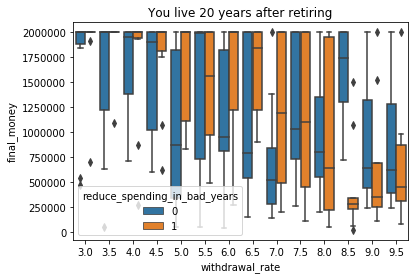

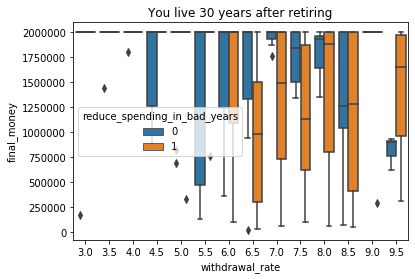

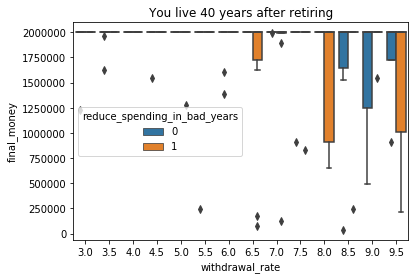

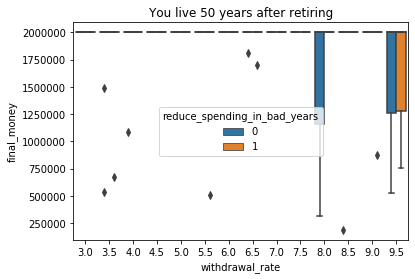

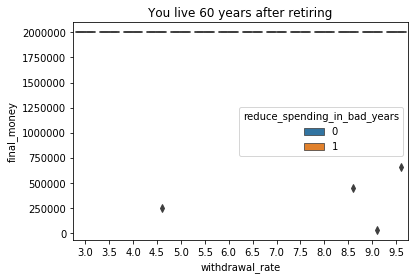

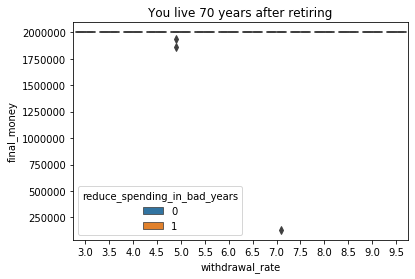

In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data_for_plot = pd.DataFrame(data=results)
data_for_plot['final_money'] = data_for_plot['final_money'].clip(0, 2000000)

for lifespan in range(20, 80, 10):
    plt.figure()
    data_for_this_lifespan = data_for_plot['lifespan'] == lifespan
    sns.boxplot(x="withdrawal_rate", y="final_money",
                hue="reduce_spending_in_bad_years",
                data=data_for_plot[data_for_this_lifespan]).set_title(f"You live {lifespan} years after retiring")

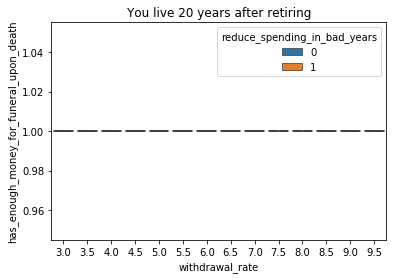

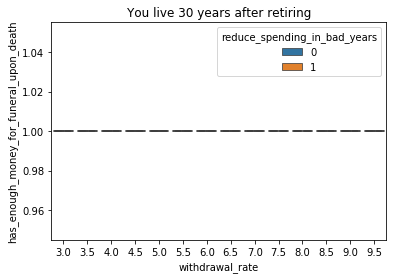

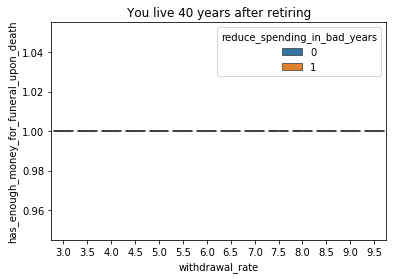

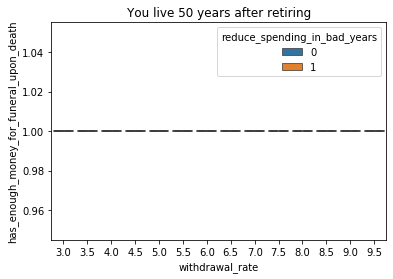

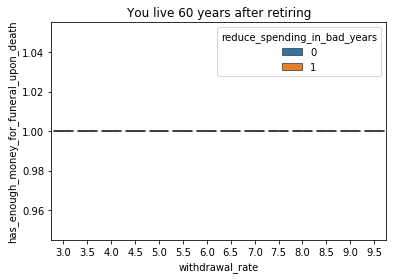

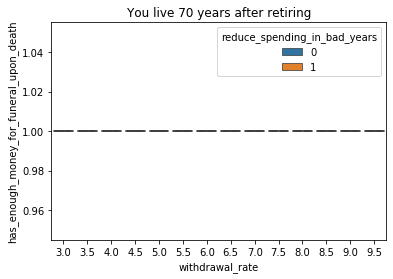

In [22]:
# Just show whether money > funeral cost

funeral_cost = 20000
data_for_plot = pd.DataFrame(data=results)
data_for_plot['has_enough_money_for_funeral_upon_death'] = data_for_plot['final_money'] > funeral_cost

for lifespan in range(20, 80, 10):
    plt.figure()
    data_for_this_lifespan = data_for_plot['lifespan'] == lifespan
    sns.boxplot(x="withdrawal_rate", y="has_enough_money_for_funeral_upon_death",
                hue="reduce_spending_in_bad_years",
                data=data_for_plot[data_for_this_lifespan]).set_title(f"You live {lifespan} years after retiring")

10
10
withdrawal_rate 3.0 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 3.0 reduce_spending_in_bad_years 1
10
10
withdrawal_rate 3.5 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 3.5 reduce_spending_in_bad_years 1
10
10
withdrawal_rate 4.0 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 4.0 reduce_spending_in_bad_years 1
9
10
withdrawal_rate 4.5 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 4.5 reduce_spending_in_bad_years 1
10
10
withdrawal_rate 5.0 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 5.0 reduce_spending_in_bad_years 1
10
10
withdrawal_rate 5.5 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 5.5 reduce_spending_in_bad_years 1
9
10
withdrawal_rate 6.0 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 6.0 reduce_spending_in_bad_years 1
9
10
withdrawal_rate 6.5 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 6.5 reduce_spending_in_bad_years 1
9
10
withdrawal_rate 7.0 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 7.0 reduce_sp

10
10
withdrawal_rate 3.0 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 3.0 reduce_spending_in_bad_years 1
9
10
withdrawal_rate 3.5 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 3.5 reduce_spending_in_bad_years 1
10
10
withdrawal_rate 4.0 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 4.0 reduce_spending_in_bad_years 1
9
10
withdrawal_rate 4.5 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 4.5 reduce_spending_in_bad_years 1
10
10
withdrawal_rate 5.0 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 5.0 reduce_spending_in_bad_years 1
8
10
withdrawal_rate 5.5 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 5.5 reduce_spending_in_bad_years 1
10
10
withdrawal_rate 6.0 reduce_spending_in_bad_years 0
10
10
withdrawal_rate 6.0 reduce_spending_in_bad_years 1
6
10
withdrawal_rate 6.5 reduce_spending_in_bad_years 0
9
10
withdrawal_rate 6.5 reduce_spending_in_bad_years 1
5
10
withdrawal_rate 7.0 reduce_spending_in_bad_years 0
9
10
withdrawal_rate 7.0 reduce_spend

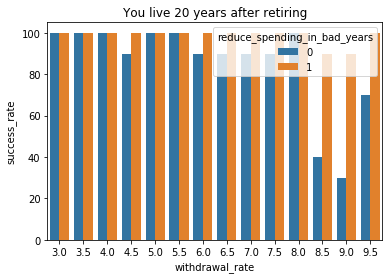

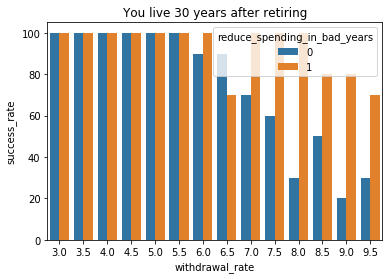

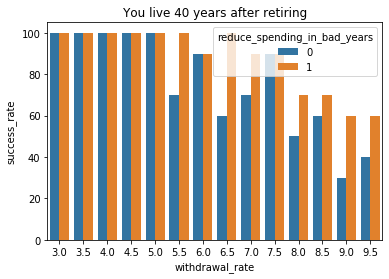

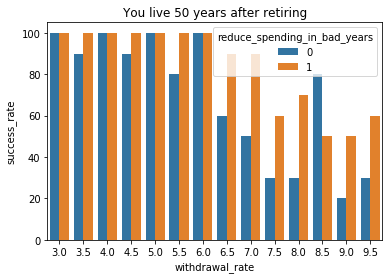

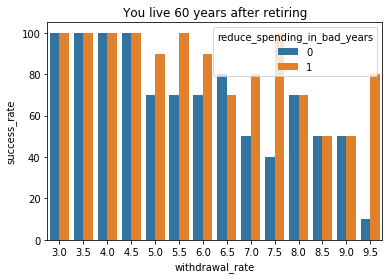

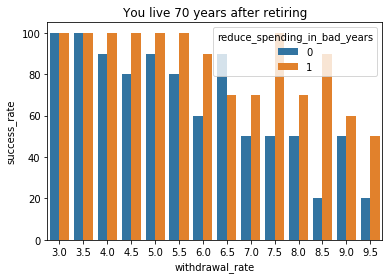

In [40]:
for lifespan in range(20, 80, 10):
    success_dataset = list()
    
    plt.figure()
    for withdrawalRateTimesTen in range (30, 100, 5):
        withdrawal_rate = withdrawalRateTimesTen / 10
        for reduce_spending_in_bad_years in range(0, 2, 1):
            success_rows = len(data_for_plot.query(f"lifespan == {lifespan} and final_money > {funeral_cost} and withdrawal_rate == {withdrawal_rate} and reduce_spending_in_bad_years == {reduce_spending_in_bad_years}")) 
            total_rows = num_trials
            
            print(success_rows)
            print(total_rows)
            print("withdrawal_rate", withdrawal_rate, "reduce_spending_in_bad_years", reduce_spending_in_bad_years)
            success_rate = float(success_rows) / float(total_rows) * 100
            success_datum = dict()
            success_datum["withdrawal_rate"] = withdrawal_rate
            success_datum["reduce_spending_in_bad_years"] = reduce_spending_in_bad_years
            success_datum["success_rate"] = success_rate
            
            success_dataset.append(success_datum)
    
    print(success_dataset)
    data_for_success_plot = pd.DataFrame(data=success_dataset)                  
    sns.barplot(x="withdrawal_rate", y="success_rate",
                    hue="reduce_spending_in_bad_years",
                    data=data_for_success_plot).set_title(f"You live {lifespan} years after retiring")
        